# Boston Housing Price Regression

Author: Dominik Chłodowicz\
Date: 2025-05-10\
Description: Predict median home values (`medv`) in Boston dataset using linear and multiple regression.

In [1]:
# Standard import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
# Load dataset
df = pd.read_csv('../data/Boston.csv')

# Quick overview
print(f"Dataset shape: {df.shape}")
display(df.head())
display(df.describe().T)

Dataset shape: (506, 13)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Correlation Analysis

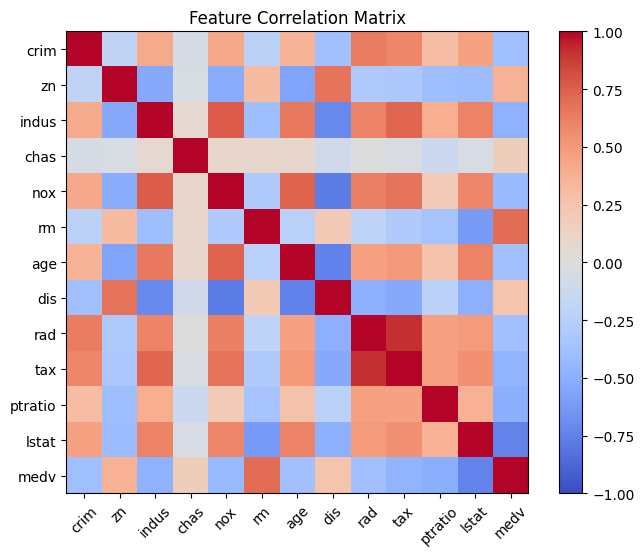

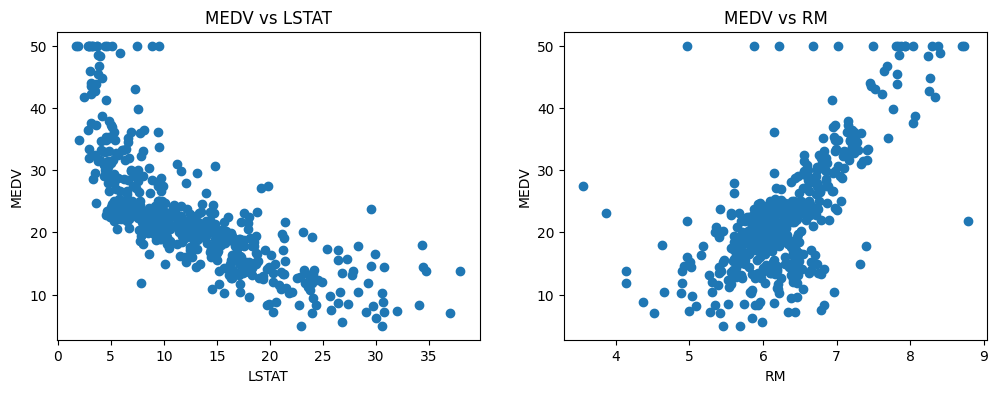

In [ ]:
# Correlation matrix
corr = df.corr()

# Heatmap
fig, ax = plt.subplots(figsize=(8,6))
im = ax.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=45)
ax.set_yticks(range(len(corr.index)))
ax.set_yticklabels(corr.index)
fig.colorbar(im, ax=ax)
plt.title('Feature Correlation Matrix')
plt.show()

# Scatter MEDV vs LSTAT and RM
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].scatter(df['lstat'], df['medv'])
axes[0].set(title='MEDV vs LSTAT', xlabel='LSTAT', ylabel='MEDV')
axes[1].scatter(df['rm'], df['medv'])
axes[1].set(title='MEDV vs RM', xlabel='RM', ylabel='MEDV')
plt.show()


### Key insights of correlation analysis
`LSTAT` (lower status of the population) - has a strong negative correlation with MEDV (r ≈ –0.74)\
`RM` (average rooms) -  has a strong positive correlation (r ≈ +0.70)

In [40]:
# Features & target
X = df[['lstat']]  
y = df['medv']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
lr_simple = LinearRegression().fit(X_train, y_train)

# Predict & evaluate
y_pred_simple = lr_simple.predict(X_test)
r2_simple = r2_score(y_test, y_pred_simple)
mse_simple = mean_squared_error(y_test, y_pred_simple)
print(f"Simple LR → R²: {r2_simple:.3f}, MSE: {mse_simple:.3f}")


Simple LR → R²: 0.489, MSE: 38.099


### Key insights of linear regression results

$R^²$ ~ 0.49: ~49% of variance in home values explained by `LSTAT` alone.\
$MSE$ - 38% is not bad result

In [ ]:
# Select features
X_multi = df[['lstat','rm']]

# Split data
X_tr, X_te, y_tr, y_te = train_test_split(X_multi, y, test_size=0.3, random_state=42)

# Train model
lr_multi = LinearRegression().fit(X_tr, y_tr)

# Predict & evaluate
y_pred_multi = lr_multi.predict(X_te)
r2_multi = r2_score(y_te, y_pred_multi)
mse_multi = mean_squared_error(y_te, y_pred_multi)

# Summarize results
results = pd.DataFrame({
    'Model': ['Simple LR','Multiple LR'],
    'R2': [r2_simple, r2_multi],
    'MSE': [mse_simple, mse_multi]
})

display(results)

,Model,R2,MSE
0,Simple LR,0.488698,38.098702
1,Multiple LR,0.599852,29.816278


### Key insights of multiple linear regression results

Multiple LR $R^²$ ~ 0.60, a ~22% relative improvement.

$MSE$ decreased to ~ 30%, a ~8% relative improvement, confirming better fit when adding RM.